# Welcome to Claire's PAW Tracker! This is an education tool to provide an anlaysis of a dog's breathing rate per minute. 
## Breathing rate tracking is critical for pets with cardiac issues. Breathing rate should be measured when your pet is asleep. 
### Monitoring breathing rate per minute is important for dogs with cardiac issues.
#### Ordinary Least Squares regression (OLS) is used to determine if there is a correlation between furosemide (diuretic) and breathing rate. Escalated breathing rates can indicate fluid in their lungs.

## Seek advice from a qualified veterinarian.

In [365]:
#### Claire's PAW tracker is meant to be an education tool to provide an anlaysis of a dog's breathing rate per minute. 
# Monitoring breathing rate per minute is important for dogs with cardiac issues.
# Seek advise from a qualified vet for advice.

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import numpy as np
#from statsmodels.formula.api import logit

## Read the data from Griffskode's Github 

In [366]:
# Import csv into pandas dataframe - Use next line if reading local file
# df = pd.read_csv('breathingdata.csv', sep=',')

# Import the dataset breathingdata.csv into pandas dataframe, "df"
url = "https://raw.githubusercontent.com/GriffsKode/griffskode.github.io/main/files/breathingdata.csv"
df = pd.read_csv(url, sep=",")
df2 = df.copy()
#Print first five lines of the imported csv file to ensure data was imported correctly
df.head(5)

,date_time,date,time,breaths_per_minute,furosemide_dose,vetmedin_dose,enalapril_dose,sildenafil_dose
0,2/24/2024 15:50,2/24/2024,15:50,23.0,0.7,1.25,1.25,NaN
1,2/24/2024 15:52,2/24/2024,15:52,22.0,0.7,1.25,1.25,NaN
2,2/24/2024 21:34,2/24/2024,21:34,12.0,0.7,1.25,1.25,NaN
3,2/24/2024 21:36,2/24/2024,21:36,12.0,0.7,1.25,1.25,NaN
4,2/25/2024 13:13,2/25/2024,13:13,14.0,0.7,1.25,1.25,NaN


In [367]:
# Print last five lines of the imported csv file to ensure all data was imported
df.tail(5)

,date_time,date,time,breaths_per_minute,furosemide_dose,vetmedin_dose,enalapril_dose,sildenafil_dose
211,9/18/2024 23:32,9/18/2024,11:32 PM,15.0,0.8,1.25,1.25,10.0
212,9/20/2024 8:00,9/20/2024,8:00 AM,15.0,0.8,1.25,1.25,10.0
213,9/20/2024 8:02,9/20/2024,8:02 AM,16.0,0.8,1.25,1.25,10.0
214,9/20/2024 22:31,9/20/2024,10:31 PM,19.0,0.8,1.25,1.25,10.0
215,9/21/2024 7:58,9/21/2024,7:58 AM,13.0,0.8,1.25,1.25,10.0


## We want to get a basic idea of the count, mean, std, min, max, etc. for Breaths Per Minute and Medicine Dose

In [368]:
# Pandas dataframe describe function to better understand the data. 
summary = df.describe()
formatted_summary = summary.round(2)
print(formatted_summary)

       breaths_per_minute  furosemide_dose  vetmedin_dose  enalapril_dose  \
count              203.00           215.00         216.00          216.00   
mean                15.94             0.72           1.25            1.25   
std                  4.38             0.12           0.00            0.00   
min                  9.00             0.50           1.25            1.25   
25%                 13.00             0.60           1.25            1.25   
50%                 15.00             0.80           1.25            1.25   
75%                 18.00             0.80           1.25            1.25   
max                 39.00             0.80           1.25            1.25   

       sildenafil_dose  
count             10.0  
mean              10.0  
std                0.0  
min               10.0  
25%               10.0  
50%               10.0  
75%               10.0  
max               10.0  


## A monthly breakdown of breaths_per_minute is calculated to better understand the monthly average. 

  year_month  Average breaths_per_minute
0    2024-02                        16.0
1    2024-03                        17.5
2    2024-04                        16.6
3    2024-05                        18.5
4    2024-06                        15.6
5    2024-07                        14.3
6    2024-08                        14.1
7    2024-09                        17.1


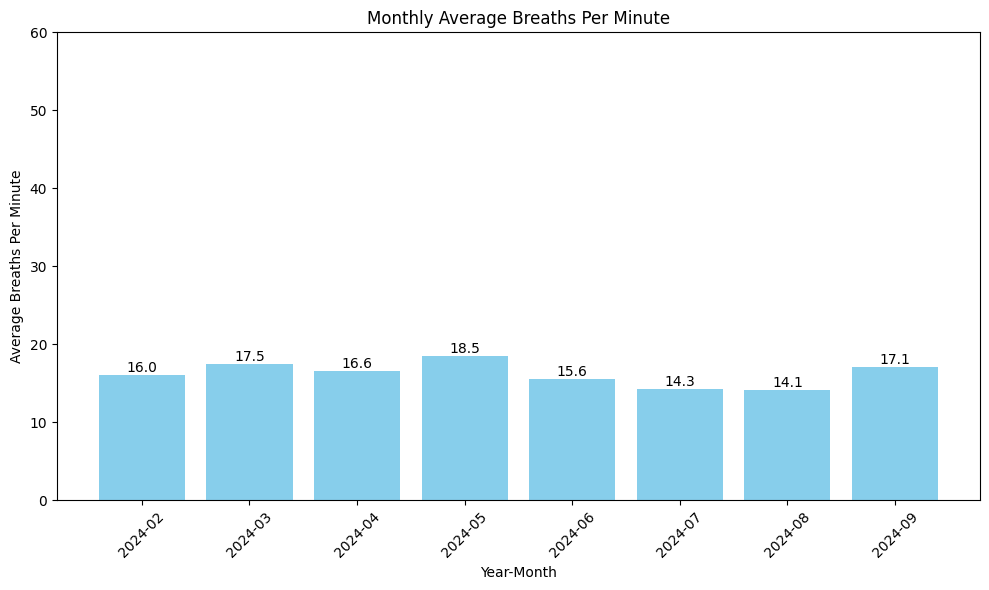

In [369]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year and month from the 'date' column
df['year_month'] = df['date'].dt.to_period('M')

# Calculate monthly averages of 'breaths_per_minute'
monthly_avg = df.groupby('year_month')['breaths_per_minute'].mean().round(1).reset_index()

# Rename the column to 'Average breaths_per_minute'
monthly_avg = monthly_avg.rename(columns={'breaths_per_minute': 'Average breaths_per_minute'})

# Display the results in printed table
print(monthly_avg)

# Plot set figure size for bar chart
plt.figure(figsize=(10, 6))
# Setting 'bars' as the plot with 'year_month' (x) versus 'Average breaths_per_minute' (x)
bars = plt.bar(monthly_avg['year_month'].astype(str), monthly_avg['Average breaths_per_minute'], color='skyblue')

# Adding data labels on each bar in the bars on the chart
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 1), ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Year-Month')
plt.ylabel('Average Breaths Per Minute')
plt.title('Monthly Average Breaths Per Minute')
plt.xticks(rotation=45)  # Rotate x-axis labels 
# Set y-axis range
plt.ylim(0, 60)

# Show the plot
plt.tight_layout()
plt.show()

## A simple scatter plot is created to visualize the data

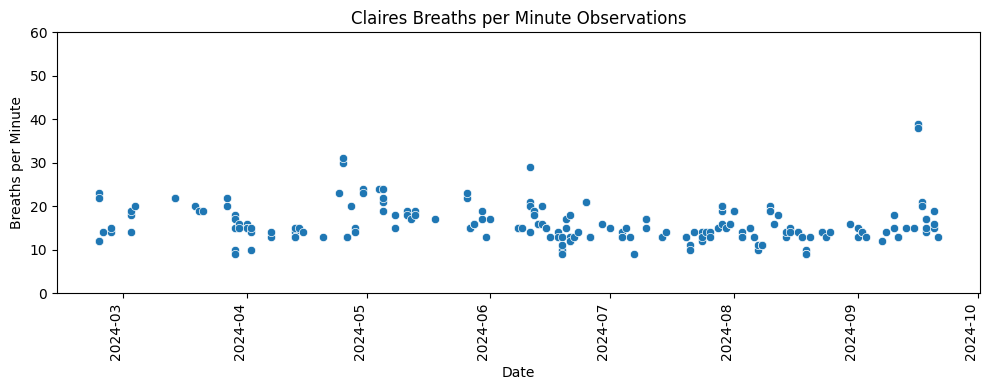

In [370]:
# Create an x date dataframe, y breaths per minute data frame. Combine both into the variable data. 
x = df['date']
y = df['breaths_per_minute']
data = pd.DataFrame({'Date': x, 'Breaths per Minute': y})

# Create scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Date', y='Breaths per Minute', data=data)

# Format x-axis labels
plt.xticks(rotation=90, ha='right')
# Set y-axis range
plt.ylim(0, 60)

# Add title and labels
plt.title('Claires Breaths per Minute Observations')
plt.xlabel('Date')
plt.ylabel('Breaths per Minute')

plt.tight_layout()
plt.show()

## Next we want to get an idea of the frequency that the range of breaths per minute occurs.

Text(0, 0.5, 'Number of Data Points')

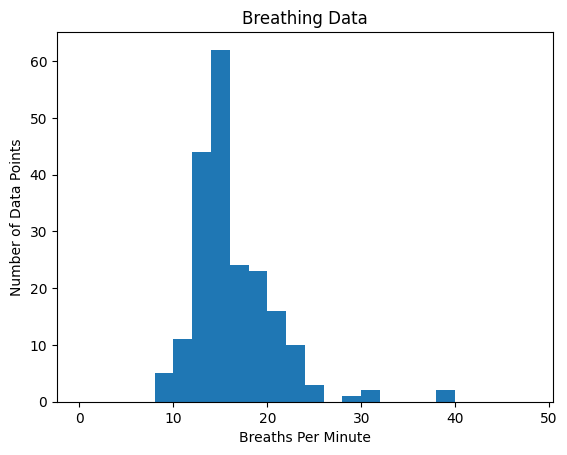

In [371]:
plt.hist(df['breaths_per_minute'], bins = range(0,50,2))
plt.title('Breathing Data')
plt.xlabel('Breaths Per Minute')
plt.ylabel('Number of Data Points')

## Next we want to visualize the overall linear trend of breaths_per_minute

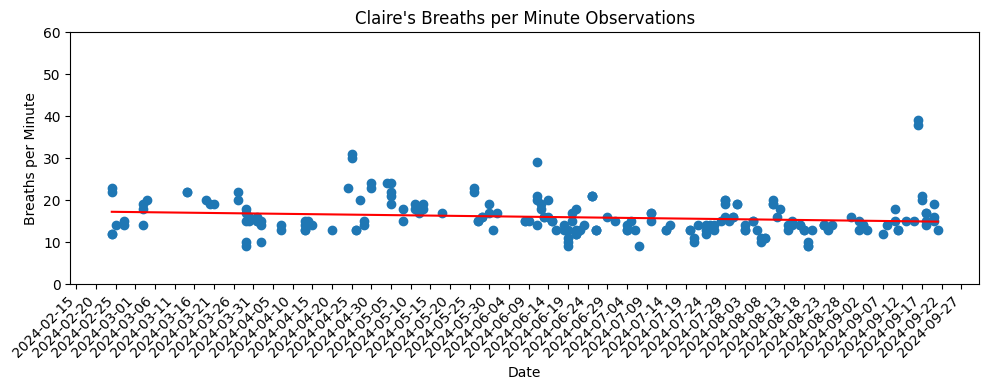

Data DataFrame:
          Date  Breaths per Minute  Date_Ordinal
0   2024-02-24                23.0        738940
1   2024-02-24                22.0        738940
2   2024-02-24                12.0        738940
3   2024-02-24                12.0        738940
4   2024-02-25                14.0        738941
..         ...                 ...           ...
211 2024-09-18                15.0        739147
212 2024-09-20                15.0        739149
213 2024-09-20                16.0        739149
214 2024-09-20                19.0        739149
215 2024-09-21                13.0        739150

[203 rows x 3 columns]


In [372]:
# df2 was stored at the beginning to preserve input data. 
df = df2.copy()
df['date'] = pd.to_datetime(df['date'])

# Remove rows with missing values in 'date' or 'breaths_per_minute'
df = df.dropna(subset=['date', 'breaths_per_minute'])

# Create an x date dataframe, y breaths per minute data frame. Combine both into the variable data.
x = df['date']
y = df['breaths_per_minute']
data = pd.DataFrame({'Date': x, 'Breaths per Minute': y})

# Convert date to numerical format for trend line (since regression requires numerical values)
data['Date_Ordinal'] = data['Date'].map(pd.Timestamp.toordinal)

# Prepare data for the regression
X = data['Date_Ordinal'].values.reshape(-1, 1)
y = data['Breaths per Minute'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
trendline = model.predict(X)

# Create scatter plot with linear trendline
plt.figure(figsize=(10, 4))

# Scatter plot with actual dates on x-axis
plt.scatter(data['Date'], data['Breaths per Minute'], label='Observations')

# Plot the trendline using the same dates
plt.plot(data['Date'], trendline, color='red', label='Trend Line')

# Set x-axis to format dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Set y-axis range
plt.ylim(0, 60)

# Add title and labels
plt.title('Claire\'s Breaths per Minute Observations')
plt.xlabel('Date')
plt.ylabel('Breaths per Minute')

plt.tight_layout()
plt.show()
# Debugging: Print the contents of the DataFrame
print("Data DataFrame:")
print(data)

In [373]:
print(df)

           date_time       date      time  breaths_per_minute  \
0    2/24/2024 15:50 2024-02-24     15:50                23.0   
1    2/24/2024 15:52 2024-02-24     15:52                22.0   
2    2/24/2024 21:34 2024-02-24     21:34                12.0   
3    2/24/2024 21:36 2024-02-24     21:36                12.0   
4    2/25/2024 13:13 2024-02-25     13:13                14.0   
..               ...        ...       ...                 ...   
211  9/18/2024 23:32 2024-09-18  11:32 PM                15.0   
212   9/20/2024 8:00 2024-09-20   8:00 AM                15.0   
213   9/20/2024 8:02 2024-09-20   8:02 AM                16.0   
214  9/20/2024 22:31 2024-09-20  10:31 PM                19.0   
215   9/21/2024 7:58 2024-09-21   7:58 AM                13.0   

     furosemide_dose  vetmedin_dose  enalapril_dose  sildenafil_dose  
0                0.7           1.25            1.25              NaN  
1                0.7           1.25            1.25              NaN  
2     

## Outliers are Identified Using Clustering (K-Nearest Neighbors, KNN)
## Outliers are identified to flag breathing rates that are not statistically similar to other data points. This does not mean something is wrong with your dog, however pay close attention. The more data the better!
### pyOD KNN modeling algorithm is used to identify outliers. 

In [374]:
import pyod
from pyod.models.knn import KNN

#df3 = df[['breaths_per_minute']].astype('int')
df3 = df[['date_time', 'breaths_per_minute']]

# Ensure 'date_time' is properly parsed as a datetime object
df3.loc[:, 'date_time'] = pd.to_datetime(df3['date_time'], errors='coerce')  # Coerce invalid dates to NaT

# Drop rows with invalid or missing dates (NaT values)
df3 = df3.dropna(subset=['date_time'])

# Convert breaths_per_minute to integer type
df3.loc[:, 'breaths_per_minute'] = df3['breaths_per_minute'].astype('int')
print(df3)

# Set KNN parameters
# Contamination rate is set as 2 percent. This number can be adjusted if not correctly identifying outliers
knn = KNN(contamination=0.02,method='mean',n_neighbors=5)
# Fit breaths_per_minute to KNN model
knn.fit(df3[['breaths_per_minute']])

# Predict the outliers from the breaths_per_minute column
predicted = pd.Series(knn.predict(df3[['breaths_per_minute']]), index=df3.index)

# Print the number of outliers
print('The Number of outliers = ', predicted.sum())

# Select only Outlier Values knn_values == 1
outliers = df3[predicted == 1]

# Print outliers with date_time and breaths_per_minute
print('Outliers detected:')
print(outliers[['date_time', 'breaths_per_minute']])


               date_time  breaths_per_minute
0    2024-02-24 15:50:00                23.0
1    2024-02-24 15:52:00                22.0
2    2024-02-24 21:34:00                12.0
3    2024-02-24 21:36:00                12.0
4    2024-02-25 13:13:00                14.0
..                   ...                 ...
211  2024-09-18 23:32:00                15.0
212  2024-09-20 08:00:00                15.0
213  2024-09-20 08:02:00                16.0
214  2024-09-20 22:31:00                19.0
215  2024-09-21 07:58:00                13.0

[203 rows x 2 columns]
The Number of outliers =  2
Outliers detected:
               date_time  breaths_per_minute
204  2024-09-16 17:30:00                39.0
205  2024-09-16 17:45:00                38.0


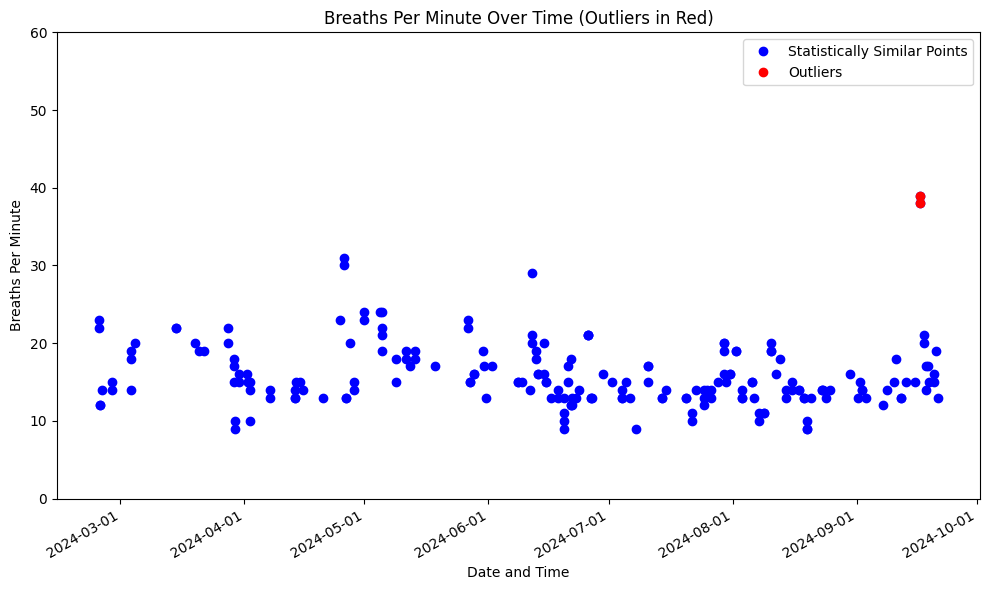

In [375]:
# Plot set figure size
plt.figure(figsize=(10, 6))

# Plot 'normal points' in blue
plt.plot(df3['date_time'], df3['breaths_per_minute'], 'bo', label='Statistically Similar Points')

# Plot 'outliers' in red
plt.plot(outliers['date_time'], outliers['breaths_per_minute'], 'ro', label='Outliers')

# Plot labels and title
plt.xlabel('Date and Time')
plt.ylabel('Breaths Per Minute')
plt.title('Breaths Per Minute Over Time (Outliers in Red)')

# Plot legend
plt.legend()

# Set x-axis to properly format dates
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Set y-axis range
plt.ylim(0, 60)

# Show the plot
plt.tight_layout()
plt.show()

## OLS Regression can be used to see if there is a correlation between furosemide_dose and breaths_per_minute.
## P>|t| value should be greater than 0.05 to be significant.

In [376]:
 # df2 was stored at the beginning to preserve input data. 
df = df2.copy()

# OLS Regression to determine if the furosemide_dose has a correlation with breaths per minute.
# P>|t| value should be greater than 0.05 to be significant.
est = ols(formula="breaths_per_minute ~ furosemide_dose", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     breaths_per_minute   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     5.564
Date:                Sat, 21 Sep 2024   Prob (F-statistic):             0.0193
Time:                        15:06:16   Log-Likelihood:                -581.87
No. Observations:                 202   AIC:                             1168.
Df Residuals:                     200   BIC:                             1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          20.5090      1.967     